In [1]:
%matplotlib inline



# Cliques

This example shows how to compute and visualize cliques of a graph using :meth:`igraph.GraphBase.cliques`.


In [2]:
import igraph as ig
import matplotlib.pyplot as plt

First, let's create a graph, for instance the famous karate club graph:



In [3]:
g = ig.Graph.Famous('Zachary')

Computing cliques can be done as follows:



In [4]:
cliques = g.cliques(4, 4)

We can plot the result of the computation. To make things a little more
interesting, we plot each clique highlighted in a separate axes:



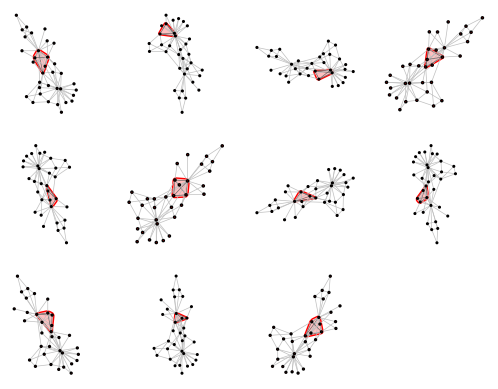

In [5]:
fig, axs = plt.subplots(3, 4)
axs = axs.ravel()
for clique, ax in zip(cliques, axs):
    ig.plot(
        ig.VertexCover(g, [clique]),
        mark_groups=True, palette=ig.RainbowPalette(),
        edge_width=0.5,
        target=ax,
    )
plt.axis('off')
plt.show()

## Advanced: improving plotting style
If you want a little more style, you can color the vertices/edges within each
clique to make them stand out:



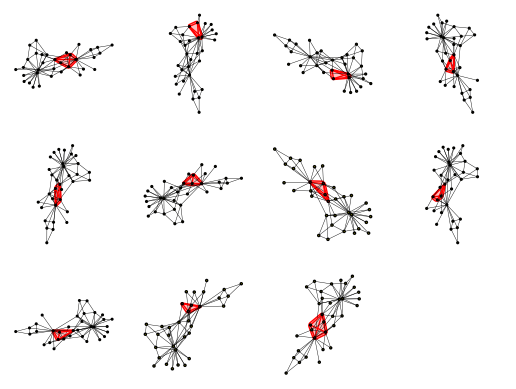

In [6]:
fig, axs = plt.subplots(3, 4)
axs = axs.ravel()
for clique, ax in zip(cliques, axs):
    # Color vertices yellow/red based on whether they are in this clique
    g.vs['color'] = 'yellow'
    g.vs[clique]['color'] = 'red'

    # Color edges black/red based on whether they are in this clique
    clique_edges = g.es.select(_within=clique)
    g.es['color'] = 'black'
    clique_edges['color'] = 'red'
    # also increase thickness of clique edges
    g.es['width'] = 0.3
    clique_edges['width'] = 1

    ig.plot(
        ig.VertexCover(g, [clique]),
        mark_groups=True,
        palette=ig.RainbowPalette(),
        target=ax,
    )
plt.axis('off')
plt.show()